In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hub_nash=pd.read_csv('../data/hub_requests.csv')

C:\Users\arikh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#drop unwanted columns
hub_nash=hub_nash.drop(columns= ['State Issue',
                                 'Preferred Language',
                                 'Mapped Location' ])

In [4]:
#drop N/A rows in these tow columns
hub_nash=hub_nash.dropna(subset=['Date / Time Opened',
                                 'Request Type',
                                 'Date / Time Closed',
                                 'Address'])

In [5]:
#change the date formate to date
#hub_nash['Date / Time Opened']=pd.to_datetime(hub_nash['Date / Time Opened'], errors='coerce')
#hub_nash['Date / Time Closed']=pd.to_datetime(hub_nash['Date / Time Closed'], errors='coerce')

In [6]:
#find the number of days between the opening and the closing time

#hub_nash['diff_days'] =hub_nash['Date / Time Closed']- hub_nash['Date / Time Opened'] #not sure why i have this here

#change the format
#hub_nash['diff_days']=hub_nash['diff_days']/np.timedelta64(1,'D')

In [7]:
hub_nash.head()

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude
4,334893,Closed,Public Safety,Control Number Request for Towing,NaN,03/29/2020 01:08:55 AM,03/29/2020 01:08:55 AM,hubNashville Community,NaN,NaN,NaN,True,Long Hollow Pike & Northcreek Blvd,GOODLETTSVILLE,10.0,37072,36.326190,-86.700618
6,323093,Closed,"Streets, Roads & Sidewalks",Illegal Dumping,Roadway,03/09/2020 01:49:36 PM,03/16/2020 09:13:59 PM,Phone,NaN,NaN,NaN,False,2600 Grovesnor Dr,ANTIOCH,28.0,37013,36.075970,-86.649030
8,323303,Closed,"Trash, Recycling & Litter",Missed Pickup - Recycle Cart Service,Recycle - Curbside/Alley Missed Pickup,03/09/2020 04:26:34 PM,03/17/2020 09:12:24 PM,Phone,NaN,NaN,NaN,False,1113 Holly St,NASHVILLE,6.0,37206,36.176300,-86.748820
10,322898,Closed,"Trash, Recycling & Litter",Cart Service,Recycling - Request an Additional Cart,03/08/2020 09:06:42 PM,03/17/2020 05:13:30 PM,hubNashville Community,NaN,NaN,NaN,False,204 Old Williamsburg Ct,NASHVILLE,25.0,37215,36.092855,-86.803188
11,323341,Closed,"Trash, Recycling & Litter",Missed Pickup - Recycle Cart Service,Recycle - Curbside/Alley Missed Pickup,03/09/2020 04:58:32 PM,03/17/2020 05:14:48 PM,Phone,NaN,NaN,NaN,False,101 Cloister Dr,NASHVILLE,23.0,37205,36.087970,-86.885920


In [8]:
#Filter only phone in the request origin columns
hub_nash_PhoneRequestOrigin=hub_nash.loc[(hub_nash['Request Origin'] == "Phone")]

In [9]:
hub_nash_PhoneRequestOrigin.head()

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude
6,323093,Closed,"Streets, Roads & Sidewalks",Illegal Dumping,Roadway,03/09/2020 01:49:36 PM,03/16/2020 09:13:59 PM,Phone,NaN,NaN,NaN,False,2600 Grovesnor Dr,ANTIOCH,28.0,37013,36.075970,-86.649030
8,323303,Closed,"Trash, Recycling & Litter",Missed Pickup - Recycle Cart Service,Recycle - Curbside/Alley Missed Pickup,03/09/2020 04:26:34 PM,03/17/2020 09:12:24 PM,Phone,NaN,NaN,NaN,False,1113 Holly St,NASHVILLE,6.0,37206,36.176300,-86.748820
11,323341,Closed,"Trash, Recycling & Litter",Missed Pickup - Recycle Cart Service,Recycle - Curbside/Alley Missed Pickup,03/09/2020 04:58:32 PM,03/17/2020 05:14:48 PM,Phone,NaN,NaN,NaN,False,101 Cloister Dr,NASHVILLE,23.0,37205,36.087970,-86.885920
18,334092,Closed,"Trash, Recycling & Litter",Missed Pickup - Trash Cart Service,Trash - Curbside/Alley Missed Pickup,03/27/2020 01:20:02 PM,03/31/2020 05:16:30 PM,Phone,NaN,NaN,NaN,False,1609 Daphne Ct,BRENTWOOD,4.0,37027,36.038069,-86.767126
19,327735,Closed,"Trash, Recycling & Litter",Cart Service,Recycling - Request an Additional Cart,03/17/2020 05:54:39 PM,04/09/2020 09:08:40 AM,Phone,NaN,NaN,NaN,False,4453 Frost St,NASHVILLE,15.0,37214,36.236928,-86.694728


In [10]:
#to change the dtype of city column

#hub_nash_RequestOrigin.astype({'City': 'Object'}).dtypes #  getting error
#hub_nash_RequestOrigin['City'] = hub_nash_RequestOrigin['City'].astype(str) #getting error

#groupby city and show the count of request origin
hub_nash_PhoneRequestOrigin.groupby(['City'] )['Request Origin'].count()


City
ANTIOCH              17390
ASHLAND CITY           124
Antioch                  3
Antioch, TN              1
Ashland City, TN         2
BRENTWOOD             2398
Brentwood                1
Brighton TN              1
FRANKLIN                19
Franklin TN              1
GOODLETTSVILLE        1112
Goodlettsville           3
HERMITAGE             2909
Hermitage                5
Hermitage TN             1
Hermitage, TN            2
JOELTON                677
Joelton                  2
LA VERGNE               67
LAVERGNE                28
MADISION                 1
MADISON               9530
MOUNT JULIET            18
Madison                  3
Madison, TN              2
Mashville TN             1
NASHVILLE           143982
NASHVILLE, TN            4
NAShville                1
NOLENSVILLE             86
Nashville               66
Nashville TN            14
Nashville, TN           31
OLD HICKORY           1549
PEGRAM                  70
RIDGETOP                 2
WHITES CREEK          1

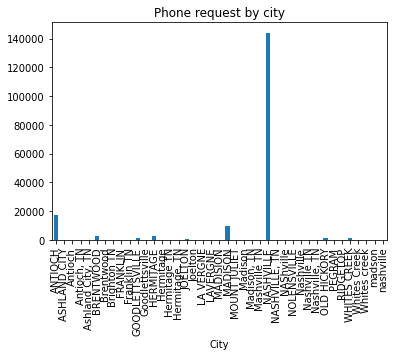

In [11]:
#another way to groupby the dataframe
council_hub_nash = hub_nash_PhoneRequestOrigin.groupby(['City'])['Request Origin'].count()
#plot the groupby dataframe
council_hub_nash.plot.bar()
plt.xticks(rotation =90)
plt.title('Phone request by city');